In [1]:
import sklearn

print(sklearn.__version__)

1.0


In [63]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트라는 분류기를 사용하기 위해 import
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import StratifiedShuffleSplit,StratifiedKFold,ShuffleSplit
import matplotlib.pyplot as plt

In [3]:
digits =load_digits()

print(digits.keys())
print(digits.DESCR)
print(digits_data.shape)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

In [8]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [12]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

0-9까지의 숫자를 분류하는 문제이다  각 숫자는 8 * 8 크기의 행렬을 가지는 이미지이다 
data의 feature로는 pixel값이 들어가 있다 


In [23]:
# 데이터 시각화 
import pandas as pd

digits_df =pd.DataFrame(digits.data,columns=digits.feature_names)
digits_result = pd.Series(digits.target,dtype="category")
digits_result = digits_result.cat.rename_categories(digits.target_names) # 카테고리로 target 이름 재 지정하기 
digits_df["Target"] = digits.target
digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [24]:
digits_df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


픽셀들의 값이라서 상관관계를 보는게 의미가 없을것 같다 


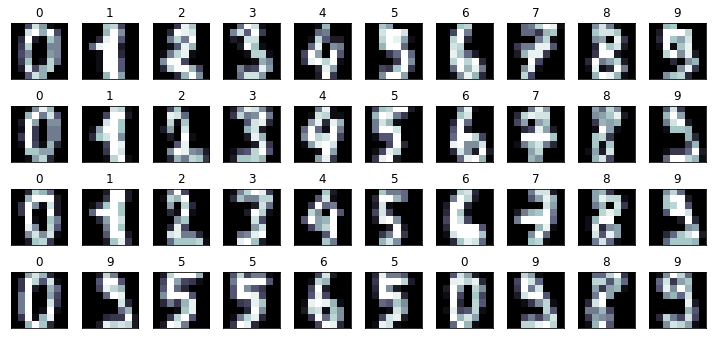

In [83]:
# 숫자 나타내기 
np.random.seed(0)
N = 4
M = 10
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(digits.images[k], cmap=plt.cm.bone, interpolation="none")
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target_names[digits.target[k]])
plt.tight_layout()
plt.show()

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [26]:
X,y=load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=9)
print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))
# len은 배열의 길이를 출력

X_train 개수:  1437 , X_test 개수:  360


# 표준화 정규화 비교 하기 

logisticRegression 적용 하기 

In [29]:
# 정규화 하기 

model = make_pipeline(MinMaxScaler(),LogisticRegression())
model.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])

In [30]:
print("정규화 학습 데이터 점수: {} ".format(model.score(X_train,y_train)))
print("정규화 평가 데이터 점수: {} ".format(model.score(X_test,y_test)))

학습 데이터 점수: 0.9874739039665971 
평가 데이터 점수: 0.9583333333333334 


In [56]:
# 표준화 하기 
X,y=load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=9)

In [57]:
model = make_pipeline(StandardScaler(),LogisticRegression())
model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [58]:
print("학습 데이터 점수: {} ".format(model.score(X_train,y_train)))
print("평가 데이터 점수: {} ".format(model.score(X_test,y_test)))

학습 데이터 점수: 0.9986082115518441 
평가 데이터 점수: 0.9666666666666667 


### 정규화 보다 표준화 했을때 성능이 더 좋았다 


### 성능 평가 

- cross_val_score 
- classification_report(y_test, y_pred)




In [60]:
predict = model.predict(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.95      0.95      0.95        40
           2       1.00      0.98      0.99        45
           3       0.97      0.97      0.97        34
           4       1.00      0.93      0.96        41
           5       0.97      0.95      0.96        39
           6       0.97      1.00      0.98        29
           7       0.96      0.93      0.95        28
           8       0.95      1.00      0.97        36
           9       0.89      0.97      0.93        35

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



logistic regression에 대해서 좋은 평가를 보여 준다 

In [46]:
# Cross val score 
from sklearn.model_selection import cross_val_score,cross_validate
X,y=load_digits(return_X_y=True)  #표준화 포함한 model이다 
scores = cross_val_score(model,X,y,cv=10)
print("교차검증 정확도: {}".format(scores))
print("교차검증 정확도 평균: {}".format(np.mean(scores)))

교차검증 정확도: [0.89444444 0.95555556 0.89444444 0.91111111 0.95       0.96666667
 0.96666667 0.96089385 0.89385475 0.93854749]
교차검증 정확도 평균: 0.9332184978274365


In [47]:
# stratified k fold 
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10,shuffle=True)
scores_skf = cross_val_score(model,X,y,cv=skf)
print("StratifiedKFold 정확도: {}".format(scores_skf))
print("StratifiedKFold 정확도 평균: {}".format(np.mean(scores_skf)))

StratifiedKFold 정확도: [0.96111111 0.98333333 0.96666667 0.97777778 0.97222222 0.95555556
 0.98333333 0.96089385 0.95530726 0.96648045]
StratifiedKFold 정확도 평균: 0.968268156424581


## Cross val score 보다 stratifiedKFold 방식을 적용했을때 성능이 더 좋았다 

In [65]:
# 최적의 파라미터 구하기 GrideSearchCV
from sklearn.model_selection import GridSearchCV
import multiprocessing
X,y=load_digits(return_X_y=True)
param_grid = {"penalty":["l1", "l2", "elasticnet", "none"],
             "C":[0.1,0.2,1.0,2.0,5.0,10.0,100.0],
              "max_iter":[100,3000,5,500,1000],
              "multi_class":['multinomial'],
             "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}

gs = GridSearchCV(estimator=LogisticRegression(),param_grid=param_grid,cv=10,
                  n_jobs=multiprocessing.cpu_count())

gs

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=16,
             param_grid={'C': [0.1, 0.2, 1.0, 2.0, 5.0, 10.0, 100.0],
                         'max_iter': [100, 3000, 5, 500, 1000],
                         'multi_class': ['multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [62]:
result = gs.fit(X,y)  # 너무 오래 걸린다 

KeyboardInterrupt: 

In [64]:
print(gs.best_estimator_)
print("최적의 점수 {}".format(gs.best_score_))
print("최적의 파라미터 {}".format(gs.best_params_))


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

## SGDClassifier() 보기 

In [112]:
from sklearn.linear_model import SGDClassifier
X,y=load_digits(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=451)

In [113]:
# SGDClassifier 적용해보기 
model = make_pipeline(StandardScaler(),SGDClassifier(shuffle=True))
model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [114]:
print("학습 데이터 점수: {} ".format(model.score(X_train,y_train)))
print("평가 데이터 점수: {} ".format(model.score(X_test,y_test)))


학습 데이터 점수: 0.988169798190675 
평가 데이터 점수: 0.9666666666666667 


In [69]:
#Grid search 해보기 SGDClassifier() 파라미터 설정하기 
param_grid = {"loss":["log","hinge","modified_huber"],
              "penalty":["l1", "l2", "elasticnet"],
              "max_iter":[200,3000,5,500,1000],
              "shuffle":[True,False],
              "alpha":[0.0001,0.001,0.1,0.00001]
             }

gs = GridSearchCV(estimator=SGDClassifier(),param_grid=param_grid,cv=10,
                  n_jobs=multiprocessing.cpu_count())



In [70]:
result = gs.fit(X,y) # 너무 오래 걸린다 

KeyboardInterrupt: 

In [ ]:
print("최적 점수 {}".format(result.best_score_))
print("최적 파라미터 {}".format(result.best_params_))

In [ ]:
result.best_estimator_

In [71]:
#Decision tree

decision_tree = DecisionTreeClassifier(random_state=32)


In [72]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

In [73]:
y_pred = decision_tree.predict(X_test)
y_pred

array([1, 1, 7, 2, 4, 0, 1, 8, 8, 3, 1, 0, 5, 3, 6, 2, 3, 3, 2, 5, 3, 5,
       0, 0, 6, 8, 3, 2, 3, 8, 0, 1, 3, 2, 6, 0, 1, 7, 1, 3, 9, 2, 1, 4,
       1, 1, 2, 8, 4, 4, 0, 2, 8, 4, 8, 5, 7, 3, 7, 2, 9, 2, 6, 1, 5, 2,
       0, 5, 1, 6, 8, 6, 7, 6, 1, 9, 5, 1, 7, 6, 4, 0, 8, 5, 9, 1, 1, 7,
       3, 7, 6, 4, 1, 5, 3, 4, 6, 8, 2, 6, 2, 8, 4, 1, 6, 4, 0, 5, 7, 8,
       1, 3, 4, 3, 2, 3, 8, 6, 2, 5, 0, 7, 8, 9, 0, 1, 9, 2, 5, 6, 7, 8,
       9, 2, 4, 3, 8, 9, 5, 5, 2, 2, 1, 5, 4, 0, 1, 8, 3, 5, 4, 5, 2, 5,
       1, 7, 5, 3, 7, 7, 9, 3, 5, 7, 6, 9, 0, 3, 4, 1, 6, 0, 6, 3, 2, 7,
       3, 9, 2, 2, 2, 8, 9, 4, 2, 5, 8, 3, 7, 9, 2, 8, 5, 0, 1, 8, 9, 5,
       7, 5, 1, 6, 9, 0, 7, 5, 1, 3, 7, 3, 0, 9, 2, 1, 1, 8, 9, 4, 0, 4,
       8, 3, 5, 3, 4, 6, 6, 5, 0, 9, 6, 0, 6, 9, 4, 1, 5, 5, 0, 4, 2, 2,
       2, 3, 4, 2, 8, 0, 8, 4, 1, 1, 4, 2, 3, 8, 1, 4, 2, 8, 1, 2, 7, 1,
       1, 2, 0, 2, 9, 6, 1, 9, 3, 7, 4, 7, 7, 7, 7, 5, 6, 7, 5, 9, 2, 9,
       1, 6, 2, 9, 5, 2, 0, 5, 6, 2, 9, 1, 3, 4, 1,

In [74]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8555555555555555

교차검증 정확도: 0.8416666666666666


In [75]:
#random foreset

random_forest = RandomForestClassifier(random_state=32) # RandomForest분류기 객체를 생성

In [76]:
random_forest.fit(X_train, y_train) # 훈련
y_pred = random_forest.predict(X_test) # 예측

In [82]:
from sklearn.model_selection import cross_val_score,cross_validate
sss=StratifiedShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
ss=ShuffleSplit(n_splits=5,test_size=0.2,random_state=32)
skf=StratifiedKFold(n_splits=5)

scores = cross_val_score(random_forest,digits_data,digits_label,cv=sss)

print("교차검증 정확도: {}".format(np.max(scores)))

교차검증 정확도: 0.9888888888888889


## model을 Randomforest 하고 cv 설정을 stragifiedshuffleSplit 했을때가 SGDClassifier() 사용했을때보다 성능이 더 좋다 

In [77]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9833333333333333

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        34
           4       0.98      0.98      0.98        41
           5       1.00      0.97      0.99        39
           6       1.00      1.00      1.00        29
           7       0.90      0.96      0.93        28
           8       1.00      0.94      0.97        36
           9       0.95      1.00      0.97        35

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [79]:
#SVM
svm_model = svm.SVC() # 모델 객체를 만든다.
svm_model.fit(X_train, y_train) # 훈련
y_pred = svm_model.predict(X_test) # 예측


In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        34
           4       0.98      0.98      0.98        41
           5       1.00      0.97      0.99        39
           6       1.00      1.00      1.00        29
           7       1.00      0.96      0.98        28
           8       1.00      1.00      1.00        36
           9       0.92      1.00      0.96        35

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



# 숫자 데이터 회고 

숫자를 분류하는 문제였다 각 숫자들은 8*8 사이즈의 행렬로 이루어져 있다 

로지스틱 회귀도 다중 분류 문제 적용 가능하다 하지만 SGDClassifier가 더 높을것으로 예상된다 


로지스틱 회귀도 다중 분류를 적용해볼수있고 역시 높은 성능이 나왔다 이진 분류가 아니라서 그런지 모르겠지만 f1 score ,recall은 함수를써도 
구할수없었다 그레서 classification_report()함수를 사용했다 정규화 보다 표준화를 해주었을때 더 높은 성능이 나온것을 보면 이상치값이 많았을것으로 예상이 된다 그리고 logisticregression의 최적의 
파라미터를 gridsearchCV로 구해 볼려고 했으나 시간이 너무 오래 걸려서 코드만 작성하고 넘어갔다 
model을 Randomforest 하고 cv 설정을 stragifiedshuffleSplit 했을때가 성능이 좋았다
SGDClassifier 성능 높이기 위해 데이터 split할때 randomstate를 찾는 실험을 진행 했다
SVM 이나 decision tree 같은 경우 이해도가 부족해서 lms 내용만으로 채워 넣었다 

<br>
</br>
숫자 데이터 이미지 출력 참고 링크 

https://datascienceschool.net/03%20machine%20learning/09.01%20%EB%B6%84%EB%A5%98%EC%9A%A9%20%EC%98%88%EC%A0%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0.html